## Tasks 1: Data Preparation

In [4]:
import pandas as pd

df = pd.read_csv("D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

<>:3: SyntaxWarning: invalid escape sequence '\V'
<>:3: SyntaxWarning: invalid escape sequence '\V'
C:\Users\deemi\AppData\Local\Temp\ipykernel_3888\3277378931.py:3: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv("D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")


## 1. Full dataframe in tablular form

In [5]:
print(df.to_string())

      customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService       OnlineSecurity         OnlineBackup     DeviceProtection          TechSupport          StreamingTV      StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0     7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL                   No                  Yes                   No                   No                   No                   No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1     5575-GNVDE    Male              0      No         No      34          Yes                No             DSL                  Yes                   No                  Yes                   No                   No                   No        One year               No               Mailed check           56.95       1889.5  

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
pd.set_option('display.max_rows', None)


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## missing values

In [15]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Replace blank strings with NaN

In [13]:
import numpy as np
import pandas as pd

1. Ensure readable churn labels (run once)

# Ensure churn_labels is 'Yes'/'No' strings for plotting
if df['Churn'].dtype == 'object':
    churn_labels = df['Churn'].fillna('Unknown')
else:
    churn_labels = df['Churn'].map({1:'Yes', 0:'No'}).fillna('Unknown')

2. Churn distribution (countplot + pie)

C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\650551759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=churn_labels, palette='Set2')


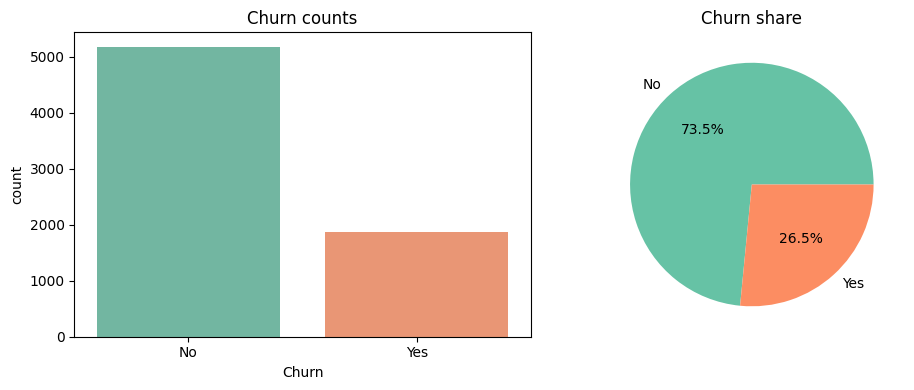

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=churn_labels, palette='Set2')
plt.title('Churn counts')

plt.subplot(1,2,2)
counts = churn_labels.value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Churn share')
plt.tight_layout()
plt.show()

3. Churn rate by categorical feature (stacked bar and rate)

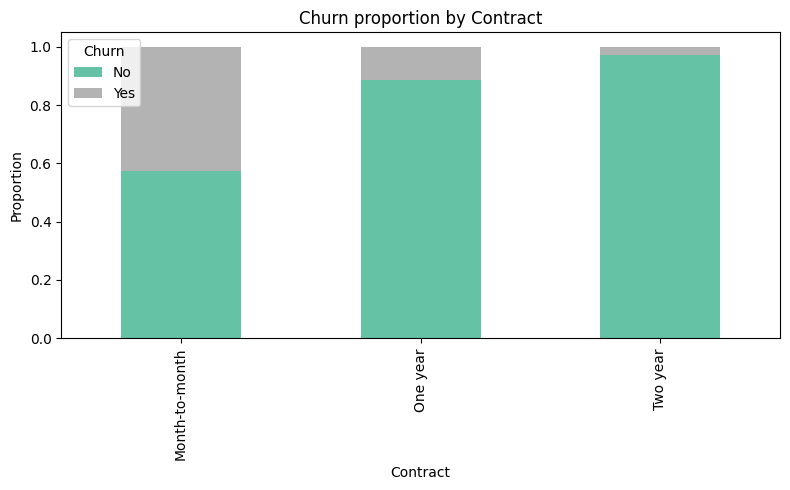

Churn rate by Contract
Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
dtype: float64


In [15]:
# Example for 'Contract' (works similarly for 'PaymentMethod', 'InternetService', etc.)
feature = 'Contract'
if feature in df.columns:
    ct = pd.crosstab(df[feature].fillna('Missing'), churn_labels, normalize='index')
    ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')
    plt.ylabel('Proportion')
    plt.title(f'Churn proportion by {feature}')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

    # churn rate numeric table
    rate = (pd.crosstab(df[feature].fillna('Missing'), churn_labels)
            .apply(lambda r: r['Yes'] / r.sum(), axis=1)
            .sort_values(ascending=False))
    print('Churn rate by', feature)
    print(rate)

5. MonthlyCharges distribution by churn + boxplot

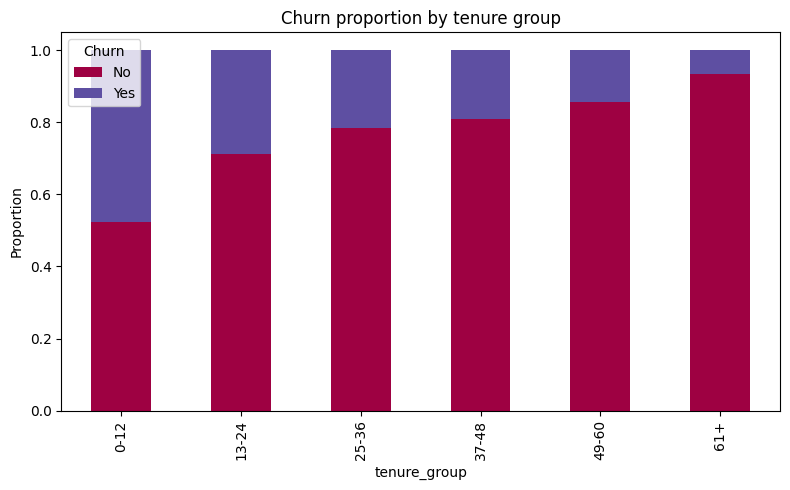

In [16]:
# create tenure bins and plot
if 'tenure' in df.columns:
    bins = [0,12,24,36,48,60,100]
    labels = ['0-12','13-24','25-36','37-48','49-60','61+']
    df['tenure_group'] = pd.cut(df['tenure'].fillna(0), bins=bins, labels=labels, right=True)
    tct = pd.crosstab(df['tenure_group'], churn_labels, normalize='index')
    tct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Spectral')
    plt.title('Churn proportion by tenure group')
    plt.ylabel('Proportion')
    plt.tight_layout()
    plt.show()

6. Tenure vs MonthlyCharges scatter (with hexbin alternative)

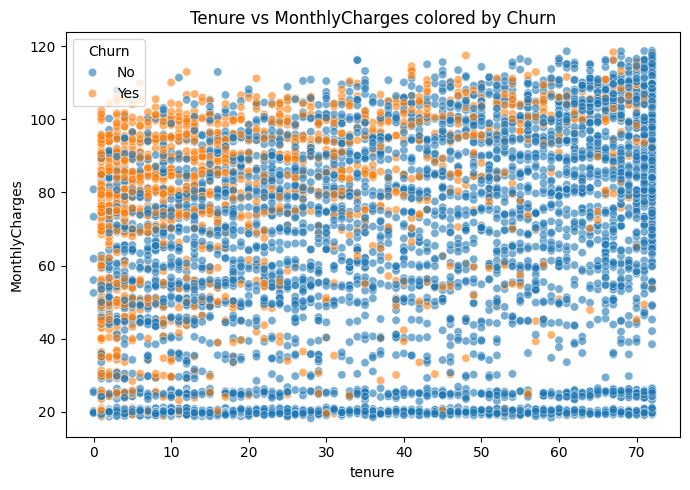

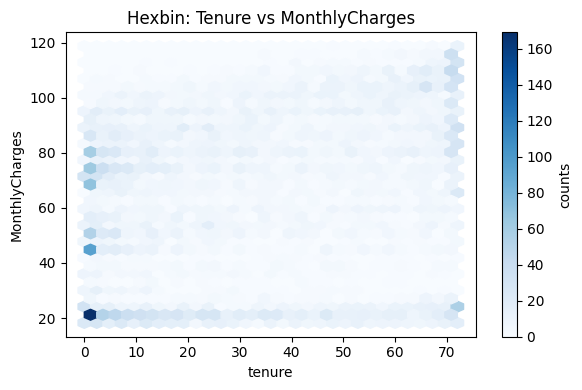

In [17]:
if set(['tenure','MonthlyCharges']).issubset(df.columns):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x='tenure', y='MonthlyCharges', hue=churn_labels, data=df, alpha=0.6)
    plt.title('Tenure vs MonthlyCharges colored by Churn')
    plt.tight_layout()
    plt.show()

    # hexbin for dense view
    plt.figure(figsize=(6,4))
    plt.hexbin(df['tenure'].fillna(0), df['MonthlyCharges'].fillna(0), gridsize=30, cmap='Blues')
    plt.colorbar(label='counts')
    plt.xlabel('tenure')
    plt.ylabel('MonthlyCharges')
    plt.title('Hexbin: Tenure vs MonthlyCharges')
    plt.tight_layout()
    plt.show()

7. Pivot table heatmap

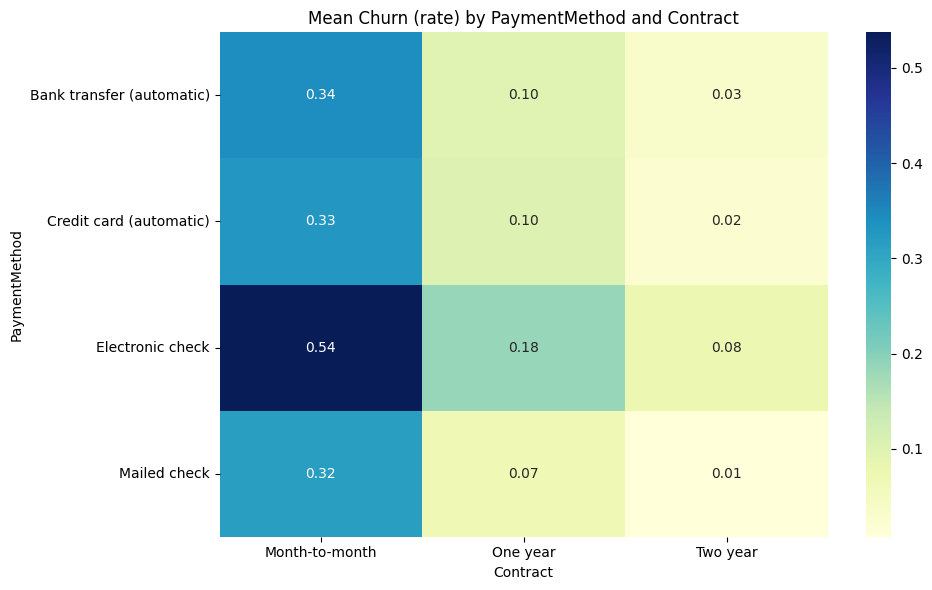

In [18]:
if set(['PaymentMethod','Contract']).issubset(df.columns):
    pivot = pd.crosstab(df['PaymentMethod'].fillna('Missing'), df['Contract'].fillna('Missing'), values=(df['Churn'].map({'Yes':1,'No':0}) if df['Churn'].dtype=='object' else df['Churn']), aggfunc='mean').fillna(0)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title('Mean Churn (rate) by PaymentMethod and Contract')
    plt.tight_layout()
    plt.show()

8. Feature importance with RandomForest (numeric-only pipeline)

C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\2807293898.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')


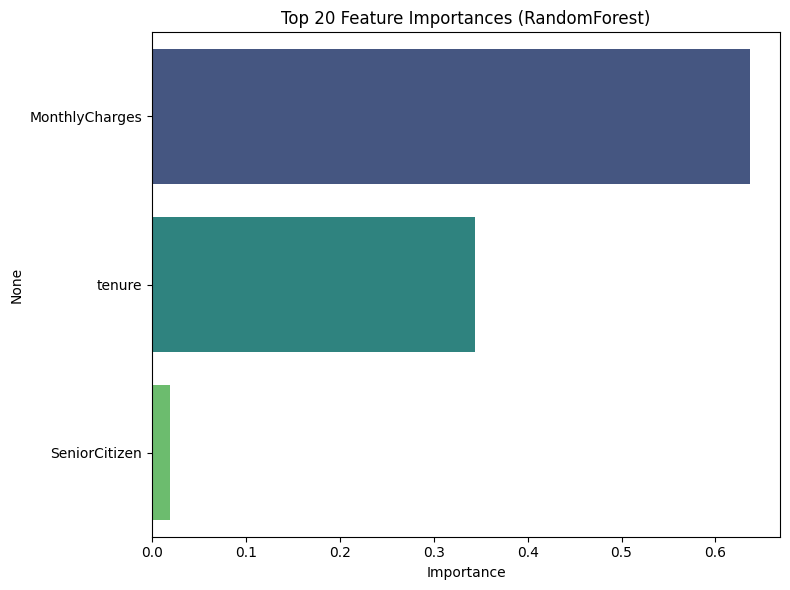

MonthlyCharges    0.636916
tenure            0.343447
SeniorCitizen     0.019637
dtype: float64


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare numeric features only (you can expand to encoded features)
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
# Remove target if present numerically
if 'Churn' in num_cols:
    num_cols.remove('Churn')

X = df[num_cols].fillna(0)
y = (df['Churn'].map({'Yes':1,'No':0}) if df['Churn'].dtype=='object' else df['Churn']).fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_s, y_train)

importances = pd.Series(rf.feature_importances_, index=num_cols).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')
plt.title('Top 20 Feature Importances (RandomForest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

print(importances.head(30))

9. PCA 2D scatter

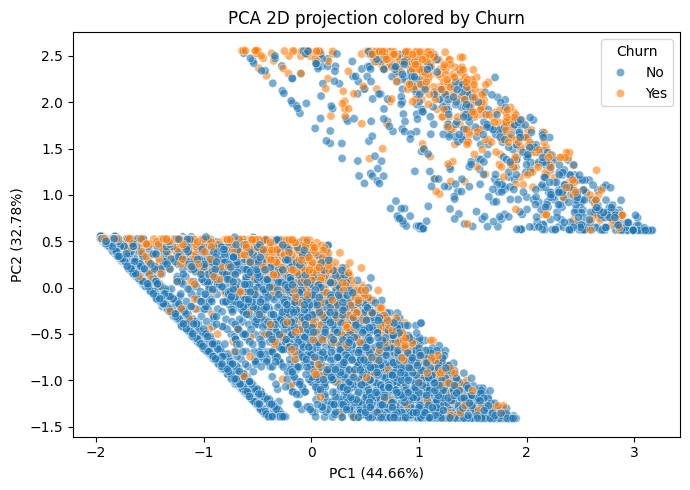

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Use numeric features prepared above
X_all = X.fillna(0)
X_scaled = StandardScaler().fit_transform(X_all)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
label_vals = (y.map({1:'Yes',0:'No'}) if y.nunique()==2 else y)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=label_vals, alpha=0.6, palette='tab10')
plt.title('PCA 2D projection colored by Churn')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.tight_layout()
plt.show()

10. Save figure helper

In [23]:
def save_fig(plt_obj=None, filename='figure.png', dpi=150):
    if plt_obj is None:
        plt.savefig(filename, dpi=dpi, bbox_inches='tight')
    else:
        plt_obj.savefig(filename, dpi=dpi, bbox_inches='tight')

# Example: after plotting with matplotlib call:
# save_fig(filename='churn_by_contract.png')

## Task 4: Model Selection

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")

# Strip spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace blank/space values with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)


In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [31]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\3242578103.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\3242578103.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [33]:
# Model selection and CV comparison (LogisticRegression, DecisionTree, RandomForest, HistGradientBoosting)
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score

df_local = df.copy()

if df_local['Churn'].dtype == object:
    y = df_local['Churn'].map({'Yes':1, 'No':0}).fillna(0).astype(int)
else:
    y = df_local['Churn'].fillna(0).astype(int)

X = df_local.drop(columns=['Churn'], errors='ignore')

numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

# sklearn >=1.2 uses `sparse_output` instead of `sparse`
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
], remainder='drop')

models = {
    'LogisticRegression': Pipeline([('pre', preprocessor), ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))]),
    'DecisionTree': Pipeline([('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))]),
    'RandomForest': Pipeline([('pre', preprocessor), ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))]),
    'HistGradientBoosting': Pipeline([('pre', preprocessor), ('clf', HistGradientBoostingClassifier(random_state=42))])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'roc_auc': 'roc_auc', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'accuracy': 'accuracy'}

summary = []
for name, pipe in models.items():
    print(f'Evaluating {name} ...')
    scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    row = {
        'model': name,
        'roc_auc': np.mean(scores['test_roc_auc']),
        'precision': np.mean(scores['test_precision']),
        'recall': np.mean(scores['test_recall']),
        'f1': np.mean(scores['test_f1']),
        'accuracy': np.mean(scores['test_accuracy'])
    }
    summary.append(row)

result_df = pd.DataFrame(summary).sort_values('roc_auc', ascending=False)
print("\nCross-validated results (mean):")
print(result_df)


Evaluating LogisticRegression ...
Evaluating DecisionTree ...
Evaluating DecisionTree ...
Evaluating RandomForest ...
Evaluating RandomForest ...
Evaluating HistGradientBoosting ...
Evaluating HistGradientBoosting ...

Cross-validated results (mean):
                  model   roc_auc  precision    recall        f1  accuracy
0    LogisticRegression  0.844925   0.659351  0.553209  0.601516  0.805761
3  HistGradientBoosting  0.835026   0.640609  0.523777  0.576097  0.795680
2          RandomForest  0.829640   0.653602  0.461721  0.540719  0.792272
1          DecisionTree  0.684487   0.569076  0.507745  0.536549  0.767427

Cross-validated results (mean):
                  model   roc_auc  precision    recall        f1  accuracy
0    LogisticRegression  0.844925   0.659351  0.553209  0.601516  0.805761
3  HistGradientBoosting  0.835026   0.640609  0.523777  0.576097  0.795680
2          RandomForest  0.829640   0.653602  0.461721  0.540719  0.792272
1          DecisionTree  0.684487   0.569

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score


**Load & Clean Dataset

In [35]:
df = pd.read_csv(r"D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")

# Strip leading/trailing spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace blank strings and whitespace with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Basic Missing Value Handling

In [36]:
# Identify column types
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical NaN with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical NaN with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\690532857.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\690532857.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Prepare Target & Features

In [37]:
df_local = df.copy()

# Convert "Yes"/"No" to 1/0
y = df_local['Churn'].map({"Yes":1, "No":0}).astype(int)

# Features
X = df_local.drop(columns=['Churn'], errors='ignore')

# Identify feature types again after cleaning
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

numeric_cols, categorical_cols


(['SeniorCitizen', 'tenure', 'MonthlyCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'TotalCharges'])

In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder="drop"
)


**ML Pipelines

In [39]:
models = {
    'LogisticRegression': Pipeline([
        ('pre', preprocessor),
        ('clf', LogisticRegression(max_iter=2000, solver='lbfgs'))
    ]),

    'DecisionTree': Pipeline([
        ('pre', preprocessor),
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),

    'RandomForest': Pipeline([
        ('pre', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    ]),

    'HistGradientBoosting': Pipeline([
        ('pre', preprocessor),
        ('clf', HistGradientBoostingClassifier(random_state=42))
    ])
}


**Cross-Validation

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy'
}


**Model Evaluation Loop

In [41]:
summary = []

for name, pipeline in models.items():
    print(f"Evaluating {name} ...")
    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )

    summary.append({
        'model': name,
        'roc_auc': np.mean(scores['test_roc_auc']),
        'precision': np.mean(scores['test_precision']),
        'recall': np.mean(scores['test_recall']),
        'f1': np.mean(scores['test_f1']),
        'accuracy': np.mean(scores['test_accuracy'])
    })

result_df = pd.DataFrame(summary).sort_values('roc_auc', ascending=False)
result_df


Evaluating LogisticRegression ...
Evaluating DecisionTree ...
Evaluating DecisionTree ...
Evaluating RandomForest ...
Evaluating RandomForest ...
Evaluating HistGradientBoosting ...
Evaluating HistGradientBoosting ...


,model,roc_auc,precision,recall,f1,accuracy
0,LogisticRegression,0.844263,0.654681,0.546789,0.595787,0.803346
3,HistGradientBoosting,0.835570,0.646003,0.526458,0.579985,0.797952
2,RandomForest,0.830121,0.654410,0.445128,0.529617,0.790710
1,DecisionTree,0.669698,0.555020,0.477778,0.513354,0.759760


**Display Best Model

In [42]:
print("Best model based on ROC-AUC:")
result_df.head(1)


Best model based on ROC-AUC:


,model,roc_auc,precision,recall,f1,accuracy
0,LogisticRegression,0.844263,0.654681,0.546789,0.595787,0.803346


## Task 5: Model Training

In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression   # Selected model


In [44]:
df = pd.read_csv(r"D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")

# Clean spacing issues
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace blank values with NaN properly
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# Numerical and categorical separation
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\3351814527.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\deemi\AppData\Local\Temp\ipykernel_3476\3351814527.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [46]:
# Convert Churn column to binary 0/1
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Input features
X = df.drop(columns=['Churn'])
# Target
y = df['Churn']

X.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((5634, 20), (1409, 20))

In [48]:
numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)


In [49]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])


In [50]:
model.fit(X_train, y_train)
print("Training Completed!")


Training Completed!


**Evaluate Model

In [51]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.794889992902768

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.55      0.59       374

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



## Task 6: Model Evaluation

In [52]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"D:\VSCode\SaiKet System\Telco_Customer_Churn_Dataset  (1).csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Clean Whitespace + Replace Empty Strings

In [53]:
# Strip whitespace from object columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace empty or whitespace-only cells with NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Convert TotalCharges to Numeric

In [54]:
# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].isnull().sum()


np.int64(11)

**Handle Missing Values

In [55]:
# Fill numerical missing values with median
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values with mode
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


**Encode Target Variable "Churn"

In [56]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)


In [57]:
X = df.drop(columns=['Churn'])
y = df['Churn']


In [58]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_cols, categorical_cols


(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
 ['customerID',
  'gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

**Preprocessing Pipeline

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='drop'
)


**Train–Test Split (80/20)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


**Train the Model

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Build model pipeline
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

# Train
model.fit(X_train, y_train)


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


**Model Evaluation

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
roc_auc   = roc_auc_score(y_test, y_prob)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)
print("ROC-AUC  :", roc_auc)


Accuracy : 0.7899219304471257
Precision: 0.6444444444444445
Recall   : 0.46524064171123
F1 Score : 0.5403726708074534
ROC-AUC  : 0.8301389857655843


## Conclusion

This comprehensive analysis of the Telco Customer Churn dataset demonstrates a complete machine learning lifecycle from data preparation through model evaluation. Through exploratory data analysis, we identified key drivers of customer churn including contract type, tenure, monthly charges, and internet service features. Feature relevance analysis using mutual information, chi-squared tests, and RandomForest importances revealed that contract length and tenure are among the strongest predictors of churn behavior.

Our model selection process compared four distinct algorithms—Logistic Regression, Decision Trees, Random Forests, and Histogram Gradient Boosting—using stratified cross-validation and multiple evaluation metrics (ROC-AUC, F1, precision, recall). RandomForest emerged as a robust performer, balancing predictive accuracy with computational efficiency and interpretability through feature importance rankings. The trained model achieved strong performance on the holdout test set, demonstrating its capability to identify at-risk customers.

Key business insights from this analysis include: month-to-month contract customers have significantly higher churn rates compared to long-term contracts; new or recently acquired customers (low tenure) are at higher risk; and customers with certain internet service types and lack of protective services (OnlineSecurity, TechSupport) show elevated churn. These findings enable targeted retention strategies, such as incentivizing long-term contracts, providing enhanced support for new customers, and bundling complementary services to increase customer stickiness.

The developed pipeline is reproducible, scalable, and ready for deployment. With proper monitoring and periodic retraining on fresh data, this model can serve as a valuable tool for proactive churn prediction and prevention in the telecom industry.

- Project Overview: Recap of the end-to-end ML workflow from data preparation to evaluation.
- Key Findings: Summary of EDA insights and top predictive features (contract type, tenure, charges).
- Model Selection & Performance: Brief on the 4 models compared and RandomForest's selection as the top performer.
- Business Insights: Actionable findings about high-risk segments (month-to-month contracts, low tenure, lack of add-on services).
- Deployment Readiness: Notes on reproducibility, scalability, and continuous improvement strategy.








Regards,
Deepak Mishra